In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

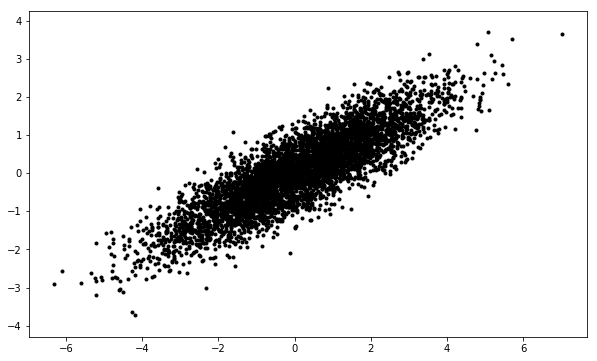

In [2]:
m = 5000
mu = np.array([0, 0])
sigma = np.array([[3, 1.5], 
                  [1.5, 1]])

X = np.random.multivariate_normal(mu, sigma, m)
X = np.asmatrix(X)

fig = plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'k.')
plt.axis('equal')
plt.show()

In [3]:
X.shape

(5000, 2)

# Solution

In [8]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

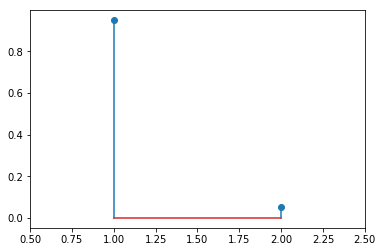

In [20]:
plt.stem(range(1,3), pca.explained_variance_ratio_)
plt.xlim([0.5,2.5])
plt.show()

In [9]:
pca.components_

array([[ 0.8832807 ,  0.46884454],
       [ 0.46884454, -0.8832807 ]])

In [12]:
u1 = pca.components_[0]
u1

array([0.8832807 , 0.46884454])

In [13]:
u1[0]

0.8832807035335215

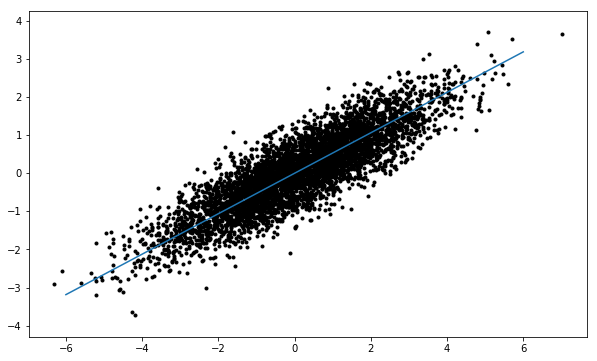

In [16]:
xp = np.linspace(-6,6,100)
yp = u1[1]/u1[0]*xp


fig = plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'k.')
plt.plot(xp,yp)
plt.axis('equal')
plt.show()

# W/O Sklearn

In [44]:
X

matrix([[-1.20215952, -1.11038778],
        [ 2.33919038,  0.08001106],
        [-0.157775  ,  0.03355573],
        ...,
        [ 1.55551726,  0.55361527],
        [ 1.83271078,  1.89839167],
        [ 1.58061746,  0.35039016]])

In [38]:
S = 1/(m-1)*X.T*X
S = np.asmatrix(S)
 
D, V = np.linalg.eig(S)

# idx = np.argsort(-D)
# D = D[idx]
# V = V[:,idx]

print(D)
print(V)

[3.84036142 0.20447129]
[[ 0.88320057 -0.46899548]
 [ 0.46899548  0.88320057]]


In [39]:
V

matrix([[ 0.88320057, -0.46899548],
        [ 0.46899548,  0.88320057]])

In [65]:
tfX = X*V
tfX

matrix([[-1.58251482, -0.41688774],
        [ 2.10349909, -1.0264039 ],
        [-0.12360948,  0.1036322 ],
        ...,
        [ 1.63347678, -0.24057725],
        [ 2.50898831,  0.81712752],
        [ 1.56033364, -0.43183766]])

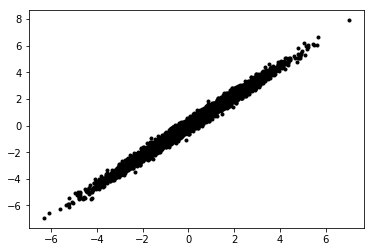

In [66]:
plt.plot(X[:,0], tfX[:,0], 'k.')

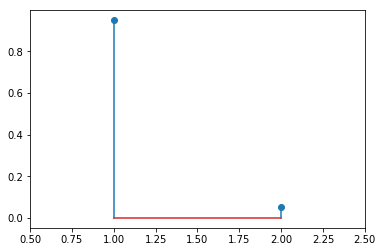

In [40]:
plt.stem(range(1,3), D/np.sum(D))
plt.xlim([0.5,2.5])
plt.show()

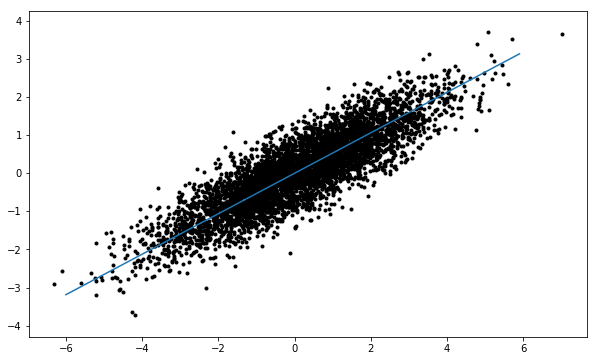

In [37]:
h = V[1,0]/V[0,0]
xp = np.arange(-6, 6, 0.1)
yp = h*xp

fig = plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'k.')
plt.plot(xp, yp)
plt.axis('equal')
plt.show()